In [1]:
import pandas as pd

df = pd.read_csv("dados_tratados.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'dados_tratados.csv'

# 📊 Projeto Telecom X – Parte 2

## 🎯 Objetivo

Este notebook tem como objetivo criar **modelos preditivos** capazes de identificar **quais clientes da empresa fictícia Telecom X possuem maior risco de evasão (churn)**. A proposta é aplicar técnicas de **Machine Learning supervisionado** utilizando os dados já tratados na Parte 1 do desafio.

Ao final deste notebook, será possível:
- Identificar os principais fatores que influenciam o churn
- Avaliar o desempenho de diferentes modelos preditivos
- Apontar quais perfis de cliente devem ser priorizados pela empresa

---

## 📁 Estrutura do notebook

1. **Importação dos dados tratados**
2. **Análise Exploratória (EDA)**
3. **Preparação dos dados para modelagem**
4. **Criação e avaliação de modelos preditivos**
5. **Comparação de resultados**
6. **Conclusão e insights obtidos**


In [2]:
# 📦 Importando bibliotecas principais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📁 Carregando os dados tratados (arquivo gerado na Parte 1)
df = pd.read_csv("dados_tratados.csv")

# 👀 Visualizando as 5 primeiras linhas
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'dados_tratados.csv'

In [3]:
df = pd.read_csv("dados_tratados.csv")
df.head()


,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 🔍 Etapa 1 – Análise Exploratória dos Dados (EDA)
Nesta etapa, vamos analisar o comportamento das variáveis, entender a distribuição dos dados e investigar possíveis padrões.


In [4]:
# Verificando o tipo das colunas e se há dados ausentes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7267 non-null   object 
 1   churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   seniorcitizen     7267 non-null   int64  
 4   partner           7267 non-null   object 
 5   dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   phoneservice      7267 non-null   object 
 8   multiplelines     7267 non-null   object 
 9   internetservice   7267 non-null   object 
 10  onlinesecurity    7267 non-null   object 
 11  onlinebackup      7267 non-null   object 
 12  deviceprotection  7267 non-null   object 
 13  techsupport       7267 non-null   object 
 14  streamingtv       7267 non-null   object 
 15  streamingmovies   7267 non-null   object 
 16  contract          7267 non-null   object 


In [5]:
# Estatísticas descritivas das variáveis numéricas
df.describe()


,seniorcitizen,tenure,charges.monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [6]:
# Verificando valores nulos
df.isnull().sum()


,0
customerid,0
churn,224
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0


In [8]:
# Removendo os registros com churn nulo
df = df[df['churn'].notnull()]


In [9]:
# Verificando se ainda há valores nulos
df['churn'].isnull().sum()


np.int64(0)

# 🔄 Classificação das variáveis (numéricas e categóricas)

Nesta etapa, vamos analisar os tipos de dados das colunas para planejar os próximos passos do pré-processamento, como a codificação de variáveis categóricas.


In [10]:
# Verificando os tipos de dados das colunas
df.dtypes


,0
customerid,object
churn,object
gender,object
seniorcitizen,int64
partner,object
dependents,object
tenure,int64
phoneservice,object
multiplelines,object
internetservice,object


# 🧠 Pré-processamento das variáveis categóricas

Nesta etapa, vamos transformar as variáveis categóricas em dados numéricos, o que é necessário para que modelos de machine learning consigam interpretá-las corretamente. Usaremos a técnica de codificação one-hot (`get_dummies`).


In [11]:
# Codificando variáveis categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Visualizando as 5 primeiras linhas do novo DataFrame
df_encoded.head()


,seniorcitizen,tenure,charges.monthly,customerid_0003-MKNFE,customerid_0004-TLHLJ,customerid_0011-IGKFF,customerid_0013-EXCHZ,customerid_0013-MHZWF,customerid_0013-SMEOE,customerid_0014-BMAQU,...,charges.total_995.35,charges.total_996.45,charges.total_996.85,charges.total_996.95,charges.total_997.65,charges.total_997.75,charges.total_998.1,charges.total_999.45,charges.total_999.8,charges.total_999.9
0,0,9,65.6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# Aplicando one-hot encoding nas variáveis categóricas (exceto a target 'churn')
df_encoded = pd.get_dummies(df, drop_first=True)

# Visualizando as 5 primeiras linhas do novo dataframe
df_encoded.head()


,seniorcitizen,tenure,charges.monthly,customerid_0003-MKNFE,customerid_0004-TLHLJ,customerid_0011-IGKFF,customerid_0013-EXCHZ,customerid_0013-MHZWF,customerid_0013-SMEOE,customerid_0014-BMAQU,...,charges.total_995.35,charges.total_996.45,charges.total_996.85,charges.total_996.95,charges.total_997.65,charges.total_997.75,charges.total_998.1,charges.total_999.45,charges.total_999.8,charges.total_999.9
0,0,9,65.6,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Removendo a coluna de ID antes da codificação
df_sem_id = df.drop("customerid", axis=1)

# Aplicando one-hot encoding nas variáveis categóricas (exceto a target 'churn')
df_encoded = pd.get_dummies(df_sem_id, drop_first=True)

# Visualizando as 5 primeiras linhas do novo dataframe
df_encoded.head()


,seniorcitizen,tenure,charges.monthly,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,...,charges.total_995.35,charges.total_996.45,charges.total_996.85,charges.total_996.95,charges.total_997.65,charges.total_997.75,charges.total_998.1,charges.total_999.45,charges.total_999.8,charges.total_999.9
0,0,9,65.6,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


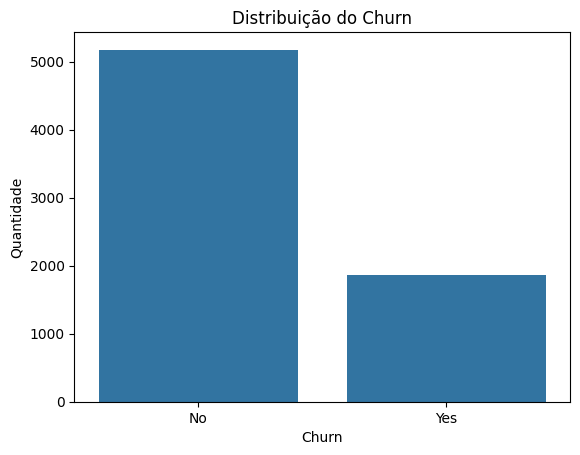

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de contagem do churn
sns.countplot(data=df, x='churn')
plt.title('Distribuição do Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.show()


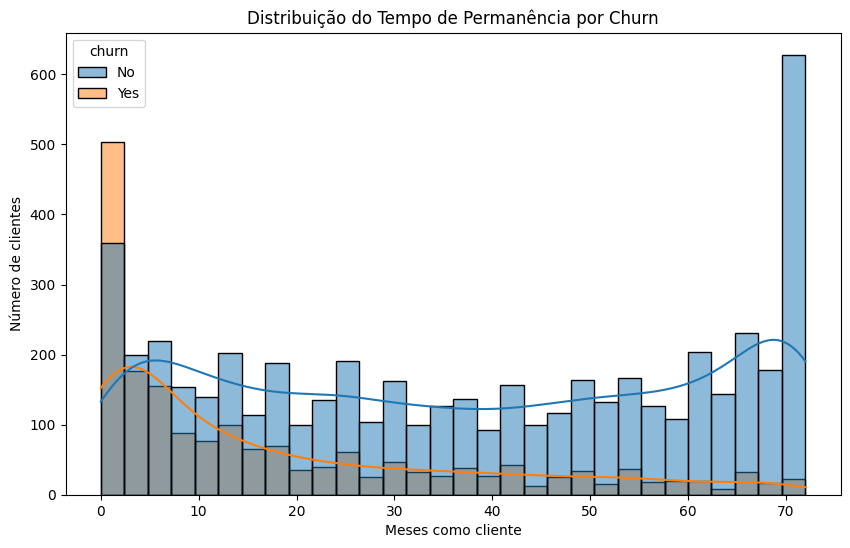

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='churn', bins=30, kde=True)
plt.title('Distribuição do Tempo de Permanência por Churn')
plt.xlabel('Meses como cliente')
plt.ylabel('Número de clientes')
plt.show()


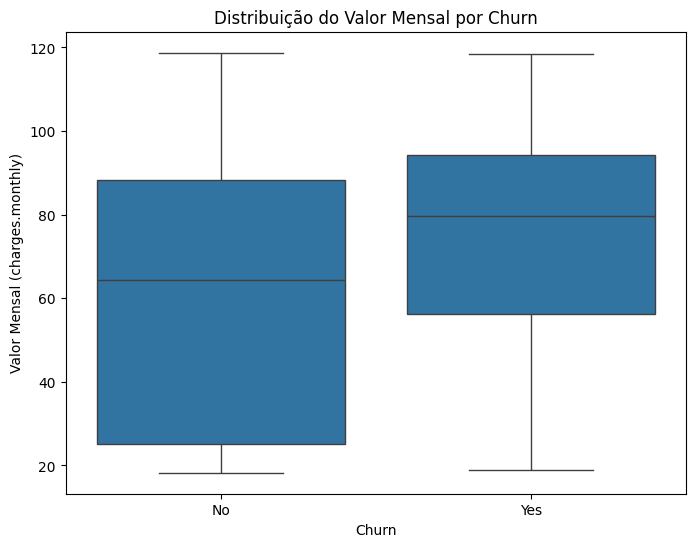

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='churn', y='charges.monthly')
plt.title('Distribuição do Valor Mensal por Churn')
plt.xlabel('Churn')
plt.ylabel('Valor Mensal (charges.monthly)')
plt.show()


In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['tenure', 'charges.monthly', 'charges.total']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Correlação entre Variáveis Numéricas')
plt.show()


ValueError: could not convert string to float: ' '

<Figure size 1000x600 with 0 Axes>

In [19]:
df[['tenure', 'charges.monthly', 'charges.total']].dtypes


,0
tenure,int64
charges.monthly,float64
charges.total,object


In [20]:
# Convertendo para tipo numérico
df['charges.monthly'] = pd.to_numeric(df['charges.monthly'], errors='coerce')
df['charges.total'] = pd.to_numeric(df['charges.total'], errors='coerce')


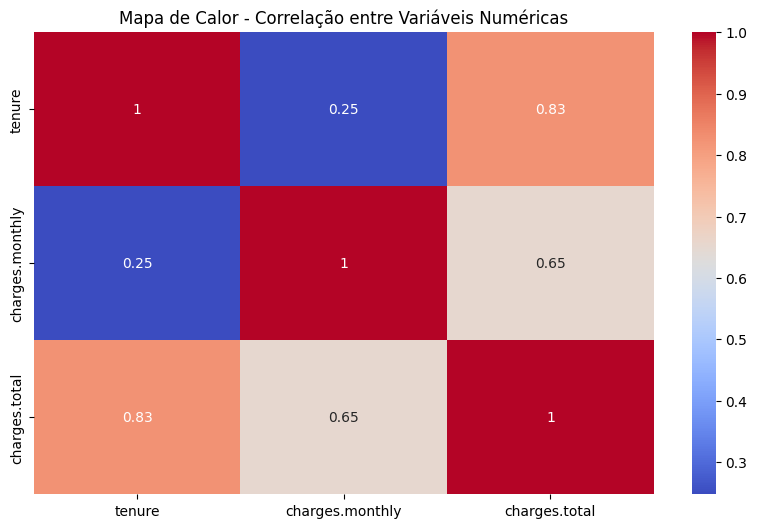

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['tenure', 'charges.monthly', 'charges.total']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Correlação entre Variáveis Numéricas')
plt.show()


In [22]:
# Verificando valores ausentes
df_encoded.isnull().sum()


,0
seniorcitizen,0
tenure,0
charges.monthly,0
churn_Yes,0
gender_Male,0
...,...
charges.total_997.75,0
charges.total_998.1,0
charges.total_999.45,0
charges.total_999.8,0


In [23]:
# Estatísticas descritivas
df_encoded.describe()


,seniorcitizen,tenure,charges.monthly
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
# Salvando o dataframe tratado em CSV
df_encoded.to_csv("dados_tratados_final.csv", index=False)


### ✅ Conclusão

Neste notebook, realizamos uma análise exploratória inicial dos dados de clientes com foco na identificação de padrões associados ao churn (evasão de clientes). As etapas incluíram:

- Carregamento e visualização dos dados;
- Codificação de variáveis categóricas com one-hot encoding;
- Geração de um mapa de calor para analisar correlações entre variáveis numéricas;
- Análise de estatísticas descritivas e verificação de valores ausentes.

O dataset final foi salvo como `dados_tratados_final.csv` e está pronto para ser utilizado em modelos preditivos ou análises mais avançadas.


In [25]:
# Bibliotecas principais
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados tratados
df = pd.read_csv("dados_tratados_final.csv")

# Visualizar as 5 primeiras linhas
df.head()


,seniorcitizen,tenure,charges.monthly,churn_Yes,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,...,charges.total_995.35,charges.total_996.45,charges.total_996.85,charges.total_996.95,charges.total_997.65,charges.total_997.75,charges.total_998.1,charges.total_999.45,charges.total_999.8,charges.total_999.9
0,0,9,65.6,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,59.9,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0,4,73.9,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,13,98.0,True,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,3,83.9,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Definindo variável alvo (churn) e variáveis preditoras
X = df.drop("churn", axis=1)
y = df["churn"]


KeyError: "['churn'] not found in axis"

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'X' is not defined

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


NameError: name 'X_train' is not defined

In [29]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo_log.predict(X_test)


NameError: name 'X_train' is not defined

In [30]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Relatório de classificação
print(classification_report(y_test, y_pred))


NameError: name 'y_test' is not defined

In [32]:
df.columns.tolist()


['seniorcitizen',
 'tenure',
 'charges.monthly',
 'churn_Yes',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'phoneservice_Yes',
 'multiplelines_No phone service',
 'multiplelines_Yes',
 'internetservice_Fiber optic',
 'internetservice_No',
 'onlinesecurity_No internet service',
 'onlinesecurity_Yes',
 'onlinebackup_No internet service',
 'onlinebackup_Yes',
 'deviceprotection_No internet service',
 'deviceprotection_Yes',
 'techsupport_No internet service',
 'techsupport_Yes',
 'streamingtv_No internet service',
 'streamingtv_Yes',
 'streamingmovies_No internet service',
 'streamingmovies_Yes',
 'contract_One year',
 'contract_Two year',
 'paperlessbilling_Yes',
 'paymentmethod_Credit card (automatic)',
 'paymentmethod_Electronic check',
 'paymentmethod_Mailed check',
 'charges.total_100.2',
 'charges.total_100.25',
 'charges.total_100.35',
 'charges.total_100.4',
 'charges.total_100.8',
 'charges.total_100.9',
 'charges.total_1001.2',
 'charges.total_1001.5',
 'charges.total_10

In [33]:
x = df.drop("churn_Yes", axis=1)
y = df["churn_Yes"]


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Criando o modelo
modelo = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
modelo.fit(x_train, y_train)

# Fazendo previsões
y_pred = modelo.predict(x_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.7672107877927609
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.83      0.86      0.85      1036
        True       0.57      0.50      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

Matriz de Confusão:
 [[896 140]
 [188 185]]


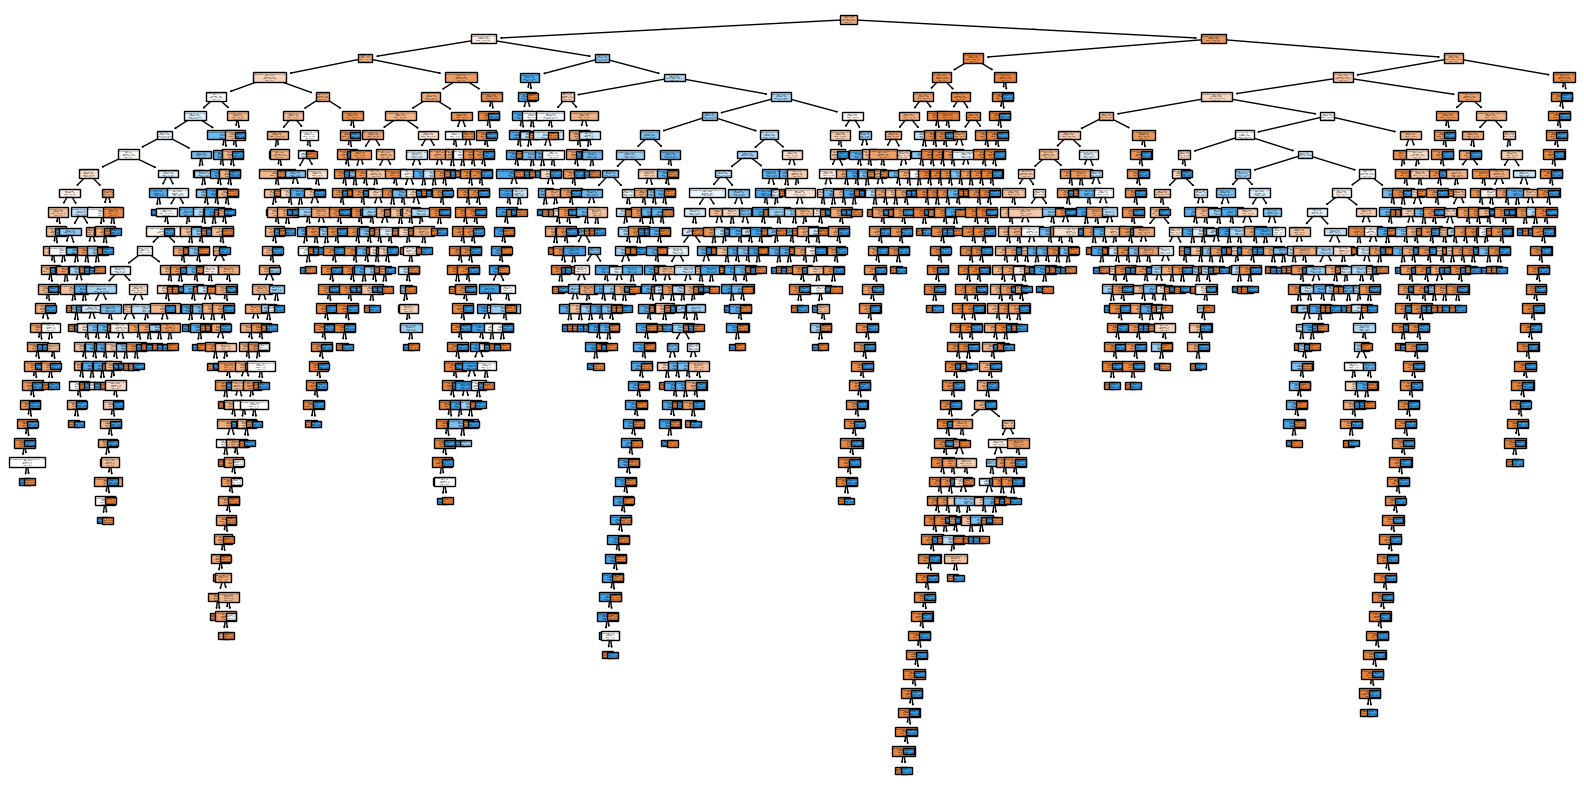

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(modelo, filled=True, feature_names=x.columns, class_names=["Não", "Sim"])
plt.show()


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fazendo previsões
y_pred = modelo.predict(x_test)

# Avaliação
print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=["Não", "Sim"]))


Acurácia do modelo: 0.7672107877927609

Matriz de Confusão:
 [[896 140]
 [188 185]]

Relatório de Classificação:
               precision    recall  f1-score   support

         Não       0.83      0.86      0.85      1036
         Sim       0.57      0.50      0.53       373

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



In [39]:
modelo = DecisionTreeClassifier(max_depth=4)  # Ajuste o número se quiser testar
modelo.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [40]:
y_pred = modelo.predict(x_test)


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Acurácia do modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=["Não", "Sim"]))


Acurácia do modelo: 0.7828246983676366

Matriz de Confusão:
 [[972  64]
 [242 131]]

Relatório de Classificação:
               precision    recall  f1-score   support

         Não       0.80      0.94      0.86      1036
         Sim       0.67      0.35      0.46       373

    accuracy                           0.78      1409
   macro avg       0.74      0.64      0.66      1409
weighted avg       0.77      0.78      0.76      1409



In [42]:
[[972  64]
 [242 131]]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-42-3099341045.py, line 1)

In [43]:
[[972  64]
 [242 131]]


SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-43-3099341045.py, line 1)

In [44]:
import numpy as np

matriz = np.array([[972, 64], [242, 131]])
print(matriz)


[[972  64]
 [242 131]]


In [45]:
matriz_confusao = [[972, 64], [242, 131]]


In [46]:
[[972, 64],
 [242, 131]]


[[972, 64], [242, 131]]

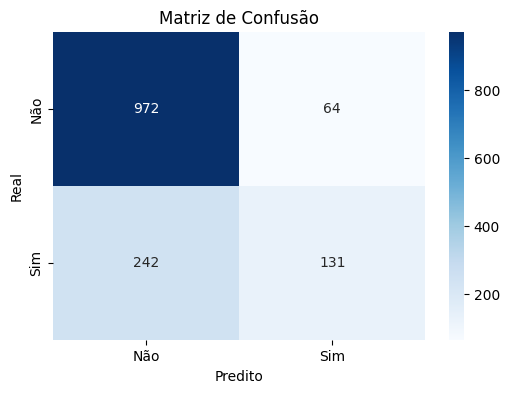

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


In [48]:
df.to_csv("dados_tratados_final.csv", index=False)
